# Day 6 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly

## Kindly load the las file of Exported.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics)
2. Plot the null values as bars
3. Create a copy of the data frame and drop the NAN values
4. Use the other copy to fill-in NAN values.
5. Which option do you prefer to work with regarding the relationship with PHIE and DT or PHIE and RHOB

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb
import lasio

In [2]:
# read log file
df = pd.read_csv("Dutch_F3_Logs\Exported.csv")
#1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics)
display(df)

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,MD,VP
0,48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN,48.0000,1.596514e+07
1,48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN,48.1500,1.596491e+07
2,48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN,48.3000,1.596468e+07
3,48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN,48.4500,1.596446e+07
4,48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN,48.6000,1.596424e+07
...,...,...,...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN,1499.2500,1.621264e+07
9676,1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN,1499.4000,1.629454e+07
9677,1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN,1499.5500,1.636550e+07
9678,1499.7001,1880.3978,537.2630,28.5813,3499957.75,-239115.9375,NaN,1499.7001,1.636772e+07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   9680 non-null   float64
 1   RHOB    8253 non-null   float64
 2   DT      9680 non-null   float64
 3   GR      9666 non-null   float64
 4   AI      9680 non-null   float64
 5   AI_REL  9680 non-null   float64
 6   PHIE    4906 non-null   float64
 7   MD      9680 non-null   float64
 8   VP      9680 non-null   float64
dtypes: float64(9)
memory usage: 680.8 KB


In [4]:
# null values
df.isnull().sum()

DEPTH        0
RHOB      1427
DT           0
GR          14
AI           0
AI_REL       0
PHIE      4774
MD           0
VP           0
dtype: int64

In [5]:
# statistics
df.describe()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,MD,VP
count,9680.000000,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000,9680.000000,9.680000e+03
mean,773.925016,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522,773.925016,1.508099e+07
std,419.177962,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282,419.177962,1.549485e+06
min,48.000000,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900,48.000000,1.121461e+07
25%,410.962500,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900,410.962500,1.403503e+07
50%,773.925000,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000,773.925000,1.539681e+07
75%,1136.887575,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800,1136.887575,1.589183e+07
max,1499.850100,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000,1499.850100,2.034821e+07


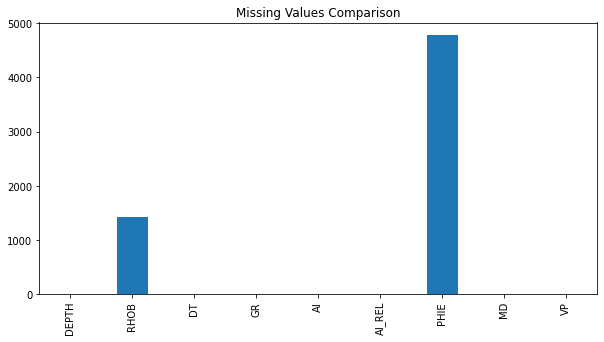

In [6]:
#2. plot the null values as bars
df.isnull().sum().plot(kind = 'bar', title = 'Missing Values Comparison', figsize=(10,5)); # pipeline() # %>%

In [7]:
#3. Create a copy of the data frame and drop the NAN values
df_copy=df
#4. Use the other copy to fill-in NAN values
#fill by interpolation (polynomial)
df_copy=df.interpolate(method='polynomial', order=2, limit_direction='backward')
df_copy.describe()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,MD,VP
count,9680.000000,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000,9680.000000,9.680000e+03
mean,773.925016,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522,773.925016,1.508099e+07
std,419.177962,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282,419.177962,1.549485e+06
min,48.000000,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900,48.000000,1.121461e+07
25%,410.962500,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900,410.962500,1.403503e+07
50%,773.925000,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000,773.925000,1.539681e+07
75%,1136.887575,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800,1136.887575,1.589183e+07
max,1499.850100,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000,1499.850100,2.034821e+07


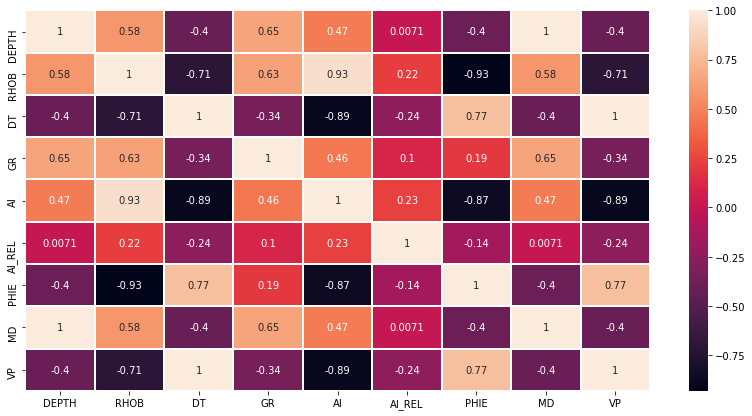

In [8]:
#5. Which option do you prefer to work with regarding the relationship with PHIE and DT or PHIE and RHOB
# heatmap to show the correlation
fig, ax = plt.subplots(figsize=(14,7))
sb.heatmap(df_copy.corr(), annot= True,linewidths=0.1);

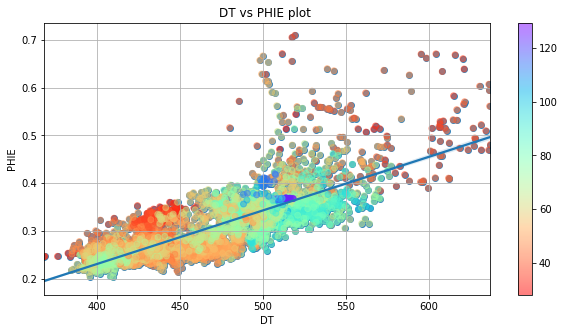

In [9]:
# plot PHIE and DT with regression
plt.figure(figsize=(10,5))
sb.regplot(x=df_copy.DT, y=df_copy.PHIE)
plt.scatter(df_copy.DT, df_copy.PHIE, c = df_copy.GR, cmap = 'rainbow_r', alpha = 0.5)
plt.colorbar()
plt.title('DT vs PHIE plot ')
plt.xlabel('DT')
plt.ylabel('PHIE')
plt.grid();